In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

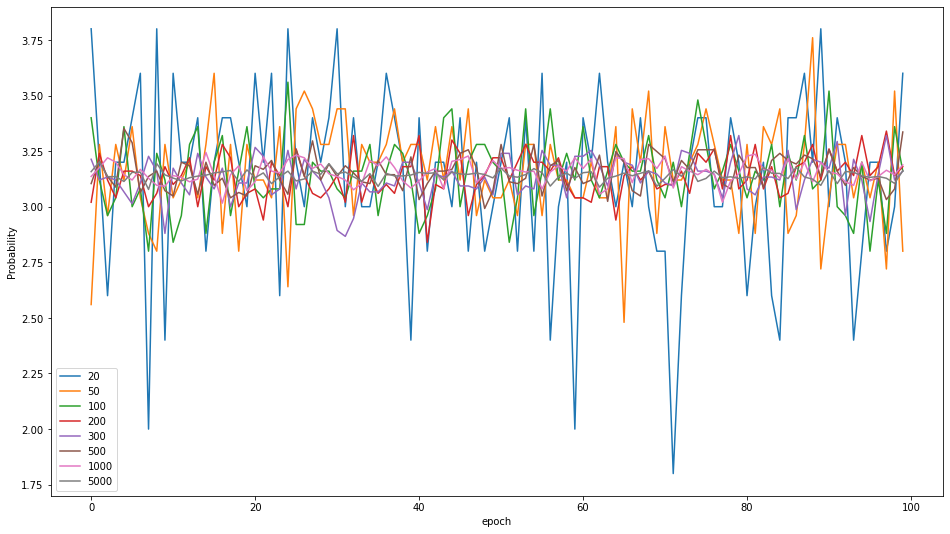

   采用数目        均值        方差
0    20  3.126000  0.155724
1    50  3.162400  0.050490
2   100  3.145600  0.026417
3   200  3.138800  0.008959
4   300  3.130933  0.008247
5   500  3.156960  0.005747
6  1000  3.155960  0.002403
7  5000  3.140648  0.000517


In [56]:
# ex1

def calculatePi(n: int):
    circle_count = 0
    
    for i in range(n):
        x = random.random()
        y = random.random()
        len_r = np.sqrt(np.power(x, 2) + np.power(y, 2))
        if len_r <= 1:
            circle_count += 1
            
    pi = circle_count * 4 / n
    return pi

def ex1():
    samples_list = [20, 50, 100, 200, 300, 500, 1000, 5000]
    categories = [str(x) for x in samples_list]
    epochs = 100
    result_dict = {}
    plt.figure(figsize=(16, 9))
    for index, n in enumerate(samples_list):
        result_list = []
        for c in range(epochs):
            result_list.append(calculatePi(n))
        result_dict[categories[index]] = result_list
        plt.plot(range(epochs), result_list)
    
    plt.legend(categories)
    plt.ylabel('Probability')
    plt.xlabel('epoch')
    plt.show()
    
    mean_list = [np.mean(v) for k, v in result_dict.items()]
    std_list = [np.var(v) for k, v in result_dict.items()]
    table = pd.DataFrame({'采用数目': samples_list, '均值': mean_list, '方差': std_list})
    print(table)
    
ex1()

In [54]:
# ex2

def canMoveTo(x: int, y: int, grid: np.array):
    result = True
    mid = (grid.shape[0] // 2, grid.shape[0] // 2)
    if (x, y) == mid:
        if grid[(x, y)] >= 2:
            result = False
    else:
        if grid[(x, y)] >= 1:
            result = False
    return result


def didMoveToDesintation():
    size = 7
    mid = (size // 2, size // 2)
    
    grid = np.zeros((size, size), dtype=np.int32)
    current = (0, 0)
    grid[current] = 1
    path = [current]
    
    result = False
    
    while True:
        p = random.random()
        
        x = current[0]
        y = current[1]
        if current == (0, 0):
            if not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y + 1, grid):
                # 绝路
                break
            else:
                if p < 0.5:
                    x += 1 # 纵走
                else: 
                    y += 1 # 横走
        elif current == (0, size - 1):
            if not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid):
                # 绝路
                break
            else:                
                if p < 0.5: 
                    x += 1
                else:
                    y -= 1
        elif current == (size - 1, 0):
            if not canMoveTo(x - 1, y, grid) and not canMoveTo(x, y + 1, grid):
                # 绝路
                break
            else:
                if p < 0.5:
                    x -= 1
                else:
                    y += 1
        elif current == (size - 1, size - 1):
                # 到达，结束！
                result = True
                break
        else:
            if x == 0:
                if not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid) and not canMoveTo(x + 1, y, grid):
                    # 绝路
                    break
                else:
                    if p < 0.3333:
                        y -=1
                    elif 0.3333 <= p < 0.6667:
                        y += 1
                    else:
                        x += 1
            elif x == size - 1:
                if not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid) and not canMoveTo(x - 1, y, grid):
                    # 绝路
                    break
                else:
                    if p < 0.3333:
                        y -=1
                    elif 0.3333 <= p < 0.6667:
                        y += 1
                    else:
                        x -= 1
            elif y == 0:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y + 1, grid):
                    # 绝路
                    break
                else:
                    if p < 0.3333:
                        x -=1
                    elif 0.3333 <= p < 0.6667:
                        x += 1
                    else:
                        y += 1
            elif y == size - 1:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid):
                    # 绝路
                    break
                else:
                    if p < 0.3333:
                        x -=1
                    elif 0.3333 <= p < 0.6667:
                        x += 1
                    else:
                        y -= 1
            else:
                if not canMoveTo(x - 1, y, grid) and not canMoveTo(x + 1, y, grid) and not canMoveTo(x, y - 1, grid) and not canMoveTo(x, y + 1, grid):
                    # 绝路
                    break
                else:
                    if p < 0.25:
                        x -= 1
                    elif 0.25 <= p < 0.5:
                        x += 1
                    elif 0.5 <= p < 0.75:
                        y -= 1
                    else:
                        y += 1
        
        if canMoveTo(x, y, grid):            
            path.append((x, y))
            current = (x, y)
            grid[current] += 1
    
#     print('grid: \n', grid)
#     print('path: ', path)
    return result

def ex2():
    total_count = 20000
    succeed_count = 0
    size = 7
    for i in range(total_count):
        if didMoveToDesintation():
            succeed_count += 1
            
    print('p = ', succeed_count / total_count)
    
ex2()

p =  0.257


In [52]:
# ex3

def isASucceed():
    result = False
    p = random.random()
    if p <= 0.85:
        result = True
    return result

def isBCSucceed():
    result = False
    p1 = random.random()
    if p1 <= 0.95:
        p2 = random.random()
        if p2 <= 0.9:
            result = True
    return result


def ex3():
    total_count = 60000
    fail_count = 0
    for i in range(total_count):
        if not isASucceed() and not isBCSucceed():
            fail_count += 1
    
    print(1 - fail_count / total_count)
    
ex3()

0.9773333333333334
